# Topological Sort - Ordenação Topológica



Vamos inicialmente pensar no seguinte problema, baseado em uma situação comum na graduação:

Existem $N$ matérias. Cada matéria possui uma lista de pré-requisitos (pode ser vazia). Em que ordem posso assistir todas as matérias (sendo que é assistida uma de cada vez), de modo que, se estou assistindo a matéria $u$, todas as matérias que são pré-requisitos de $u$ já foram assistidas anteriormente?

Isso pode ser visualizado como um grafo, em que a aresta $(u, v)$ representa que $u$ é pré-requisito de $v$.

<center>
<img src="https://i.imgur.com/CHGpI9n.png" width="50%">
</center>

Uma ordem possível para a realização das matérias é:

$$1 \rightarrow 2 \rightarrow 3 \rightarrow 4 \rightarrow 6 \rightarrow 5$$

Como visto na animação à seguir:

<center>
<img src="https://i.imgur.com/uCovAKu.gif" width="50%">
</center>

Perceba que existem outras soluções válidas para este problema, esta é apenas uma possibilidade! Além disso, pode haver casos em que não há solução - consegue pensar em algum exemplo?



# Algoritmo

A ideia principal deste algoritmo é a seguinte: vamos começar uma busca em profundidade (DFS) a partir de um vértice $u$ qualquer. Nesta busca, tentaremos visitar todos os vértices $v$ que tenham $u$ como pré-requisito, e isto é feito recursivamente. Após acabarem todas as chamadas recursivas saindo de $u$, todos os elementos que necessitam de $u$ para serem executados foram visitados, e então inserimos $u$ em um vetor $T$.

Esta etapa repete-se enquanto possuírem vértices não visitados no grafo.

Após todos os vértices serem processados, revertemos o vetor $T$, e este vetor é a resposta do algoritmo.

## Pseudocódigo

```
dfs(u):
    for v em arestas(u):
        se v não foi visitado:
            dfs(v)
    T.insere(u)

toposort():
    for u em vértices:
        se u não foi visitado:
            dfs(u)
    T.reverte()
```

Aqui também podemos observar que a complexidade deste algoritmo é a mesma de uma DFS: $O(n + m)$.

## Intuição

A intuição para se pensar neste algoritmo é a seguinte:

O vértice $u$ faz a chamada da DFS para todos os vértices dos quais é pré-requisito, e é inserido no vetor $T$ apenas no final de processamento de todos estes vértices. Assim, quando o vetor é revertido, $u$ estará antes de todos os vértices que são seus pré-requisitos.

Porém, ainda podemos nos indagar com o que acontece se o vértice $u$ (chamado inicialmente, na primeira chamada da DFS) possui algum pré-requisito. Bom, se $u$ possui algum pré-requisito $v$, este vértice ainda não foi visitado - pois, se tivesse sido, ele teria sido chamado por este vértice. Assim, como $v$ ainda não foi visitado, ele será inserido no vetor posteriormente, logo, quando o vetor for revertido, $v$ estará antes de $u$.

## Código

```c++
const int MAXN = 1e5 + 5;

vector<int> edges[MAXN];
bool vis[MAXN];
vector<int> T;
void dfs(int u) {
    vis[u] = true;
    for (int v : edges[u]) if (!vis[v]) {
        dfs(v);
    }
    T.push_back(u);
}

void toposort(int n) {
    for (int i = 1; i <= n; i++) if (!vis[i]) {
        dfs(i);
    }
    reverse(T.begin(), T.end());
}
```

## Quando existe solução?

Como dito anteriormente, nem todos os gráficos possuem uma ordenação topológica válida. Utilizando o exemplo das disciplinas, um grafo seria inválido se tivéssemos algo como: $u$ é pré-requisito de $v$, e $v$ é pré-requisito de $u$. Ou seja, existe solução apenas quando o grafo é **acíclico**.

Exemplo de grafo inválido:

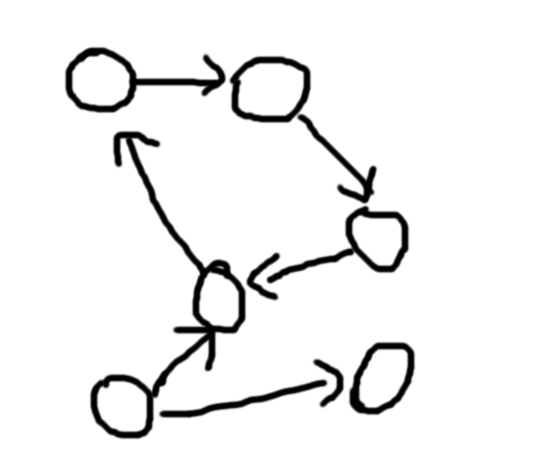

# Outra forma: Algoritmo de Kahn

Também podemos pensar neste algoritmo da seguinte forma:

1. Calcula-se o grau de entrada para todos os vértices *(de quantos vértices ele necessita de requisito)*
2. Visita-se algum vértice $u$ que não possui pré-requisito *(grau de entrada == 0)*, e o insere no vetor resposta;
3. Diminui o grau de entrada de todos os vértices partindo de $u$
4. Se ainda falta algum vértice a ser visitado, volta ao passo 2.

<center>
<img src="https://media1.giphy.com/media/0UfdhO2DMb2ylm2P94/giphy.gif" width="50%">
</center>

Nesta animação, os vértices em vermelho são os que possuem *grau de entrada* 0, os em azul são os em processamento no momento e os em verde (obrigado Débora por me falar que era verde e não amarelo) são os vértices já processados.

Este jeito é bem mais intuitivo, né? Podemos perceber que a complexidade dele também é $O(n + m)$. Para garantir a eficiência dele, basta ter algum método sagaz para saber qual vértice $u$ escolher no passo 2. Veremos agora o algoritmo para isto:

### Código (2)

```c++
const int MAXN = 1e5 + 5;
vector<int> edges[MAXN];
vector<int> T;
int ent[MAXN]; // ent[u] = grau de entrada de u

void toposort(int n) {

    // calculo do grau de entrada
    for (int u = 1; u <= n; u++) {
        for (int v : edges[u])
            ent[v]++;
    }

    // pega os caras iniciais
    vector<int> prox;
    for (int u = 1; u <= n; u++) {
        if (ent[u] == 0) prox.push_back(u);
    }

    // calcula todo mundo
    while(prox.size()) {
        int u = prox.back();
        prox.pop_back();
        T.push_back(u);

        // diminui dos vizinhos
        for (int v : edges[u]) {
            ent[v]--;
            if (ent[v] == 0)
                prox.push_back(v);
        }
    }
}

```

